In [1]:
pip install wordcloud

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install gensim

# **Import**

In [4]:
import pandas as pd
import wordcloud
from sklearn.feature_extraction.text import TfidfVectorizer

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [5]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [6]:
dataset = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dataset_preprocessed.xlsx')
dataset.head()

Unnamed: 0.1  Unnamed: 0                             id_review  \
0             0           0  0Ay4eH9Vr4jS2CE7tK4BE1Vs9co3OD9hT2pg   
1             1           1  0BQ6Xi5iz8Wf4eX2PW6tQ9OS3mm8ZY7lU1Oz   
2             2           2  0Bf3Db0je6ZF7DB0RG6SF4JU2WN8dc3ni3cT   
3             3           5  0Ey1Dm3vB3fS1GA7Cr8Hs3bA8BT7Ut6Ke4xl   
4             4           6  0FL6IO5UE3LW7ZO4lL1IR4qm3gX4nU9iF4cv   

                                  review_clean_cased  \
0  Suka Bali area keluarga yang luar biasa x D me...   
1  Saya selalu berjalan di Pantai Sanur pada hari...   
2  Lokasi paling pas liat sunrise harus datang se...   
3  Tempatnya bagus selalu ramai oleh pengunjung s...   
4  pantai sanur banyak menyimpan misteri dan sang...   

                                  review_low_uncased  \
0  suka bali area keluarga yang luar biasa x d me...   
1  saya selalu berjalan di pantai sanur pada hari...   
2  lokasi paling pas liat sunrise harus datang se...   
3  tempatnya bagus selalu ramai oleh pengunjung s...   
4  pantai sanur banyak menyimpan misteri dan sang...   

                                              review attractions amenities  \
0  Suka Bali - area keluarga yang luar biasa_x000...        none      none   
1  Saya selalu berjalan di Pantai Sanur pada hari...     positif    netral   
2  Lokasi paling pas liat sunrise..harus datang s...     positif      none   
3  Tempatnya bagus, selalu ramai oleh pengunjung....     positif      none   
4  pantai sanur banyak menyimpan misteri dan sang...     positif      none   

  access    price  ...                                     amenities_text  \
0   none     none  ...                                               none   
1   none     none  ...  Setelah Anda berjalan anda dapat menikmati hid...   
2   none  positif  ...                                               none   
3   none     none  ...                                               none   
4   none     none  ...                                               none   

  access_text                                         price_text  \
0        none                                               none   
1        none                                               none   
2        none  Lokasi paling pas liat sunrise..harus datang s...   
3        none                                               none   
4        none                                               none   

                                      no_aspect_text  \
0  Suka Bali - area keluarga yang luar biasa menc...   
1  Saya selalu berjalan di Pantai Sanur pada hari...   
2                                               none   
3                                               none   
4                                               none   

                            cleaned_text_attractions  \
0                                               none   
1  lari tonton matahari terbit indah jalan inna g...   
2  lokasi pas liat sunrise jam santai bayar parki...   
3  tempat bagus ramai unjung salah pantai favorit...   
4  pantai sanur simpan misteri unjung lokal asing...   

                              cleaned_text_amenities cleaned_text_access  \
0                                               none                none   
1  jalan nikmat hidang lokal jalan nikmat hidang ...                none   
2                                               none                none   
3                                               none                none   
4                                               none                none   

                                  cleaned_text_price  \
0                                               none   
1                                               none   
2  lokasi pas liat sunrise jam santai bayar parki...   
3                                               none   
4                                               none   

                              cleaned_text_no_aspect  \
0  suka bal area keluarga cinta jalan bal tawar a

# **Aspek Amenities**



```
# This is formatted as code
```

### **Text Negatif**

In [7]:
# bukan "none" dan mengambil "negative"
df_amenities = dataset[(dataset['amenities'] != 'none') & ((dataset['amenities'] == 'negatif'))]

df_amenities_negative = df_amenities[['cleaned_text_amenities']].values
teks_negatif = df_amenities['cleaned_text_amenities']
print(teks_negatif)
# df_amenities_negative.head()

36      temu pantai jalan daerah kumuh butuh baik upgr...
99      area pantai pribadi hotel bersih bagus kotor r...
104     olahraga air genggam coba tarif murah tarik pa...
112     pikir hotel bagus bersih gazeebos pantai santa...
120     milik kebab salmon muntah kebab perut ikan per...
320                                       sunbeds sunbeds
408     kesana anak main pantai nyaman karna speedboat...
447     makan main air bersih makan main air bersih ma...
464     sisi air jalan jual makan lokal aktivitas air ...
477     sedia duduk yg layak melhat matahari terbit ak...
480     ya fasilitas sana rapi bersih ya fasilitas san...
484     tenang pijat tawar ganggu tinggal tenang pijat...
498     pantai harap hotel milik pribadi matahari loun...
552     sulit sewa sepeda pagi salah hotel sulit sewa ...
578     overall sanur rekomendasi destinasi pantai bal...
620     resortnya kembang tinggal dg kawasan pantai ba...
628     sampah atur area pribadi daerah sampah atur ar...
657     fasili

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

wordcloud = WordCloud().generate(str(df_amenities_negative))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# **LDA Topic Modelling**

In [9]:
def tokenisasi(text):
    tokens = text.split(" ")
    return tokens
tokens_negatif = [tokenisasi(t) for t in teks_negatif]
print(tokens_negatif)

[['temu', 'pantai', 'jalan', 'daerah', 'kumuh', 'butuh', 'baik', 'upgrade', 'maaf', 'buru', 'buru', 'coba', 'minyak', 'nusa'], ['area', 'pantai', 'pribadi', 'hotel', 'bersih', 'bagus', 'kotor', 'ramai', 'sewa', 'kursi', 'tua', 'kotor', 'stabil', 'detik', 'dekat', 'ritel', 'jual', 'suvenir', 'murah', 'pijat', 'area', 'pantai', 'pribadi', 'hotel', 'bersih', 'bagus', 'kotor', 'ramai', 'sewa', 'kursi', 'tua', 'kotor', 'stabil', 'detik', 'dekat', 'ritel', 'jual', 'suvenir', 'murah', 'pijat', 'area', 'pantai', 'pribadi', 'hotel', 'bersih', 'bagus', 'kotor', 'ramai', 'sewa', 'kursi', 'tua', 'kotor', 'stabil'], ['olahraga', 'air', 'genggam', 'coba', 'tarif', 'murah', 'tarik', 'pasang', 'muslim', 'sulit', 'temu', 'makan', 'halal', 'restoran', 'dekat', 'cafe', 'milik', 'alkohol', 'layan', 'ebagai', 'pasang', 'muslim', 'sulit', 'temu', 'makan', 'halal', 'restoran', 'dekat', 'cafe', 'milik', 'alkohol', 'layan', 'pasang', 'muslim', 'sulit', 'temu', 'makan', 'halal', 'restoran', 'dekat', 'cafe', 'mi

In [10]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(tokens_negatif)
# Create Corpus
# Term Frequency
corpus = [id2word.doc2bow(text) for text in tokens_negatif]
# View
print(id2word)
print(corpus[:1])

Dictionary<224 unique tokens: ['baik', 'buru', 'butuh', 'coba', 'daerah']...>
[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]]


In [11]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('baik', 1),
  ('buru', 2),
  ('butuh', 1),
  ('coba', 1),
  ('daerah', 1),
  ('jalan', 1),
  ('kumuh', 1),
  ('maaf', 1),
  ('minyak', 1),
  ('nusa', 1),
  ('pantai', 1),
  ('temu', 1),
  ('upgrade', 1)]]

In [12]:
# Build LDA model
import gensim
lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=3,random_state=100,chunksize=100,passes=10,per_word_topics=True)

In [13]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=num_topics,random_state=100,chunksize=100,passes=10,per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

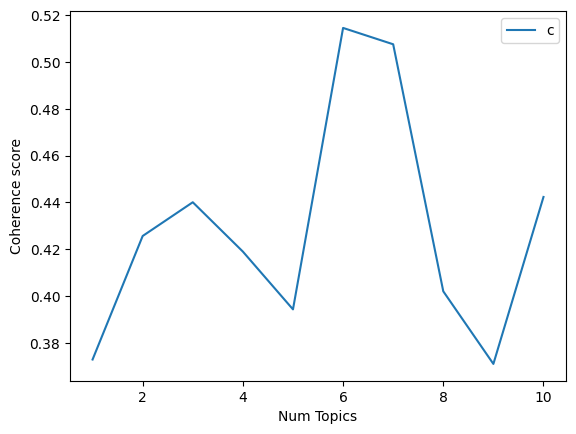

coherence_values:  [0.3728563540958938, 0.42564482056290137, 0.44006203894580365, 0.4189723390965137, 0.3942842824859905, 0.5145559870149709, 0.5075654279585111, 0.4020011375039446, 0.37097398386835295, 0.44231674099893575]


In [14]:
start=1
limit=11
step=1
model_list, coherence_values = compute_coherence_values(id2word, corpus, tokens_negatif, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)

plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
print("coherence_values: ", coherence_values)

In [15]:
lda_model.print_topics() #num_word default is 10

[(0,
  '0.031*"cafe" + 0.028*"toilet" + 0.028*"anak" + 0.028*"yg" + 0.018*"mandi" + 0.018*"tutup" + 0.018*"kamar" + 0.018*"kesana" + 0.018*"kotor" + 0.015*"area"'),
 (1,
  '0.040*"parkir" + 0.037*"bersih" + 0.037*"air" + 0.033*"makan" + 0.026*"hotel" + 0.023*"restoran" + 0.023*"pantai" + 0.023*"mobil" + 0.023*"jalan" + 0.023*"spa"'),
 (2,
  '0.057*"pantai" + 0.033*"kotor" + 0.029*"parkir" + 0.020*"air" + 0.020*"sampah" + 0.018*"bau" + 0.018*"toilet" + 0.016*"hotel" + 0.016*"ibuk" + 0.016*"sulit"')]

In [16]:
print("Topic distribution for document :", " ".join(tokens_negatif[0]))
print("feature of each token:", [(id2word[id], freq) for id, freq in corpus[0]])
lda_model.get_document_topics(corpus[0])

Topic distribution for document : temu pantai jalan daerah kumuh butuh baik upgrade maaf buru buru coba minyak nusa
feature of each token: [('baik', 1), ('buru', 2), ('butuh', 1), ('coba', 1), ('daerah', 1), ('jalan', 1), ('kumuh', 1), ('maaf', 1), ('minyak', 1), ('nusa', 1), ('pantai', 1), ('temu', 1), ('upgrade', 1)]


[(0, 0.022620207), (1, 0.024242451), (2, 0.95313734)]

In [17]:
import pandas as pd
def format_topics_sentences(ldamodel, corpus, texts):
      # Init output
      sent_topics_df = pd.DataFrame()

      # Get main topic in each document
      for i, row in enumerate(ldamodel[corpus]):
          row = sorted(row[0], key=lambda x: (x[1]), reverse=True)

          # Get the Dominant topic, Perc Contribution and Keywords for each document
          for j, (topic_num, prop_topic) in enumerate(row):
              if j == 0: # => dominant topic
                   wp = ldamodel.show_topic(topic_num, 5) #get most  significant topic
                   topic_keywords = ", ".join([word for word, prop in wp])
                   sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
              else:
                   break
      sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

      # Add original text to the end of the output
      contents = pd.Series(texts)
      sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
      return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=tokens_negatif)
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Topic Keywords', 'Text']

#Save to csv
df_dominant_topic.to_csv('/content/drive/MyDrive/Colab Notebooks/doc_topic_dominant_amenities_negative.csv')
# Show
df_dominant_topic.head(5)

<ipython-input-17-25286c550ff5>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-17-25286c550ff5>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-17-25286c550ff5>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-17-25286c550ff5>:15: FutureWarning: The frame.append method is deprecated and will be removed from p

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               2              0.9531   
1            1               2              0.9863   
2            2               1              0.9846   
3            3               1              0.9861   
4            4               0              0.9672   

                       Topic Keywords  \
0  pantai, kotor, parkir, air, sampah   
1  pantai, kotor, parkir, air, sampah   
2   parkir, bersih, air, makan, hotel   
3   parkir, bersih, air, makan, hotel   
4       cafe, toilet, anak, yg, mandi   

                                                Text  
0  [temu, pantai, jalan, daerah, kumuh, butuh, ba...  
1  [area, pantai, pribadi, hotel, bersih, bagus, ...  
2  [olahraga, air, genggam, coba, tarif, murah, t...  
3  [pikir, hotel, bagus, bersih, gazeebos, pantai...  
4  [milik, kebab, salmon, muntah, kebab, perut, i...

In [18]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model,
texts=tokens_negatif, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.44006203894580365


In [19]:
coherence_per_topic = coherence_model_lda.get_coherence_per_topic()
print('\nCoherence Per Topic Score: ', coherence_per_topic)


Coherence Per Topic Score:  [0.5038754845324864, 0.4314660985138161, 0.38484453379110845]


In [20]:
pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 26.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicor

In [21]:
pip install pandas==1.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 22.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [22]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
# Visualize the topics

pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.029306 -0.140347       1        1  50.947468
0     -0.164305  0.049560       2        1  25.273660
1      0.134999  0.090786       3        1  23.778872, topic_info=          Term       Freq      Total Category  logprob  loglift
38       makan   7.000000   7.000000  Default  30.0000  30.0000
15      bersih  10.000000  10.000000  Default  29.0000  29.0000
118     parkir  21.000000  21.000000  Default  28.0000  28.0000
31         air  16.000000  16.000000  Default  27.0000  27.0000
33        cafe   9.000000   9.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
74        main   2.490975   4.528822   Topic3  -4.4331   0.8386
93   fasilitas   2.490895   8.777317   Topic3  -4.4332   0.1768
16       dekat   2.488306   4.722314   Topic3  -4.4342   0.7957
33        cafe   2.487090   9.797329   Topic3  -4.4347   0.0654
19        jual   2.485934   4.722783   Topic3  -4.4352   0.7946

[167 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
153       2  0.986430           
31        1  0.537448        air
31        3  0.477732        air
82        2  0.790814      akses
191       2  0.874047  aktifotas
...     ...       ...        ...
60        1  0.258532     wanita
60        3  0.775597     wanita
96        3  0.661315         ya
92        1  0.452449         yg
92        2  0.542939         yg

[161 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])